# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [ ]:
# Import the titanic dataset here
import numpy as np
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [ ]:
# Create new column called type

df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew",
    "restaurant staff": "crew"
})
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,passenger
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,passenger
...,...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1,crew
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1,crew
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0,crew
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0,crew


In [ ]:
passengers = df_titanic[df_titanic["type"] == "passenger"]
passengers


,name,gender,age,class,embarked,country,ticketno,fare,survived,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.0500,0,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.0500,0,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1,passenger
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,1,passenger
...,...,...,...,...,...,...,...,...,...,...
1314,"Yvois, Miss. Henriette",female,24.0,2nd,S,France,248747.0,13.0000,0,passenger
1315,"Zakarian, Mr. Mapriededer",male,22.0,3rd,C,Turkey,2656.0,7.0406,0,passenger
1316,"Zakarian, Mr. Ortin",male,27.0,3rd,C,Turkey,2670.0,7.0406,0,passenger
1317,"Zenni, Mr. Philip",male,25.0,3rd,C,Lebanon,2620.0,7.0406,1,passenger


In [ ]:
pd.crosstab(passengers["class"], passengers["embarked"])


embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


2. Using the joint distribution that calculated above, calculate the following:
the conditional distribution of their class given where they embarked
the conditional distribution of where they embarked given their class
Use the conditional distributions that you calculate to answer the following quesitons:

What proportion of 3rd class passengers embarked at Southampton?
What proportion of Southampton passengers were in 3rd class?

In [ ]:
pd.crosstab(passengers["class"], passengers["embarked"], normalize = True)

embarked,B,C,Q,S
class,,,,
1st,0.002278,0.108580,0.002278,0.132878
2nd,0.004556,0.019742,0.005315,0.186029
3rd,0.000000,0.077449,0.085801,0.375095


In [ ]:
# P(class | embarked) (gemini helped with the import pandas as pd and normalize columns)
import pandas as pd
class_given_embarked = pd.crosstab(
    passengers["class"],
    passengers["embarked"],
    normalize="columns"
)
class_given_embarked

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


In [ ]:
# P(embarked | class) (gemini helped with normalize index)
embarked_given_class = pd.crosstab(
    passengers["class"],
    passengers["embarked"],
    normalize="index"
)
embarked_given_class


embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


1. looking at the second table we see that 69% of 3rd class embarked in Southampton
2. looking at the first table we see that 54% of Southampton passengers were in 3rd class

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

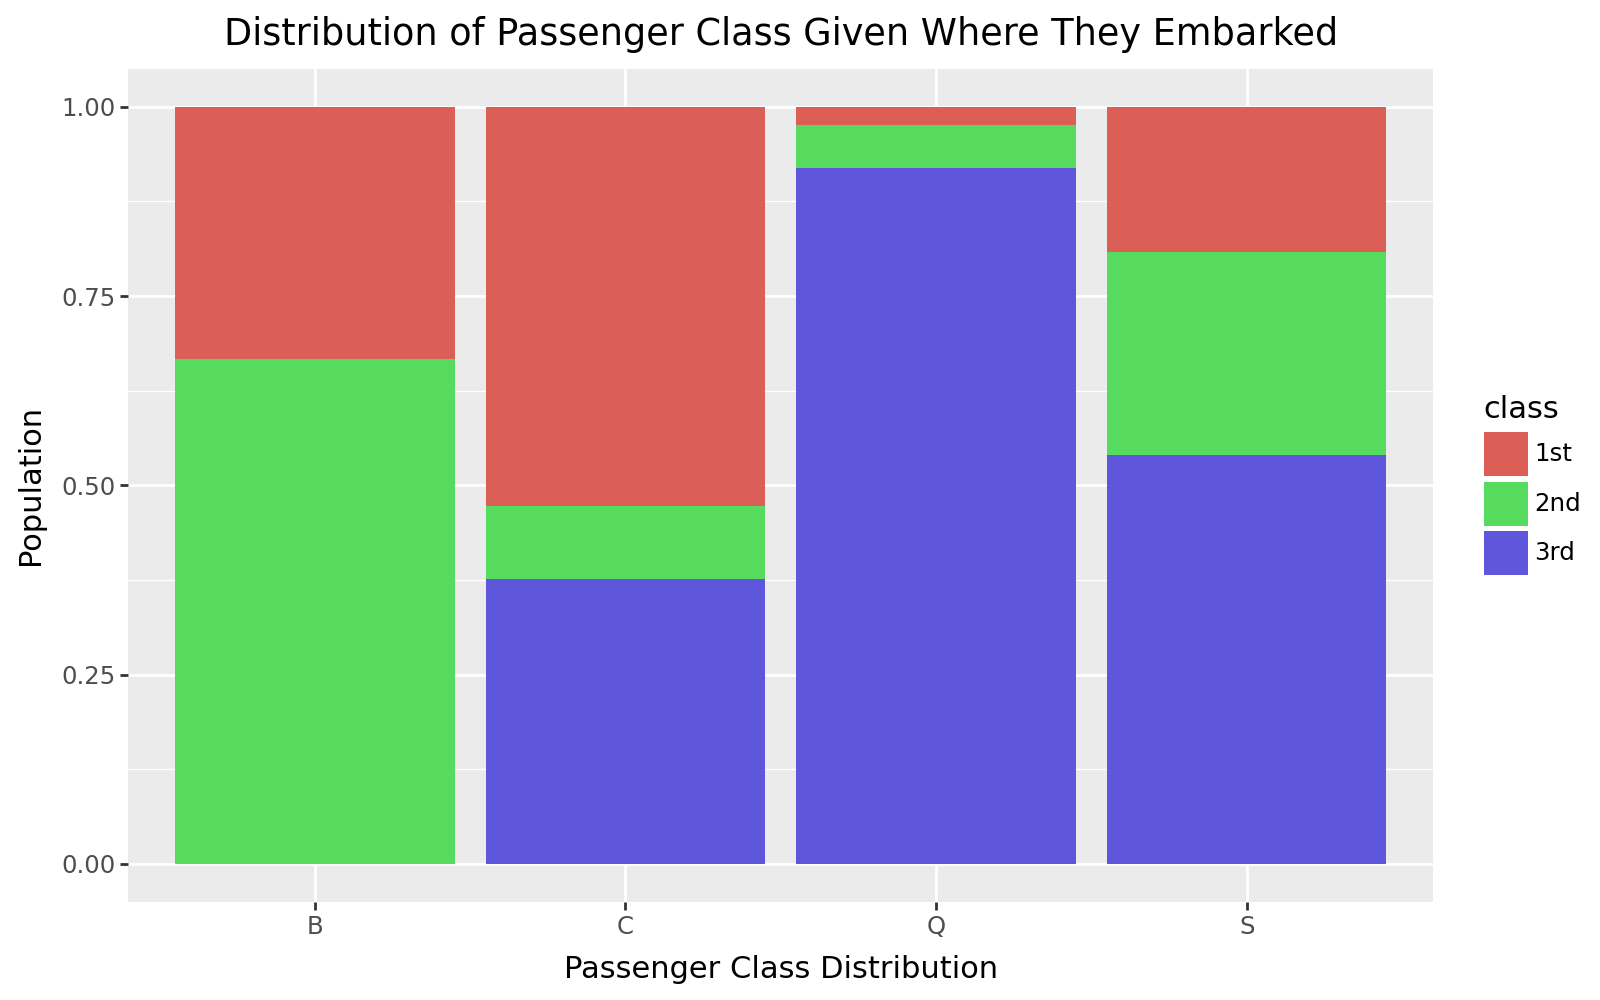

In [ ]:
# Visualization showing Distribution of a passenger's class given where they embarked (used Chat GPT for help)
from plotnine import ggplot, aes, geom_bar, labs, theme

# P(class | embarked) with a 100% stacked bar chart
(
    ggplot(passengers, aes(x="embarked", fill="class"))
    + geom_bar(position="fill")   # 'fill' makes it 100% stacked
    + labs(
        x="Passenger Class Distribution",
        y="Population",
        title="Distribution of Passenger Class Given Where They Embarked"
    )
    + theme(figure_size=(8, 5))
)


The chart shows the relative distribution of passenger classes at each port very clearly, but it does not show the actual number of passengers who embarked at each port.